# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3  AC 209 : Linear Algebra, Accuracy, and Confidence Intervals


**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">
<hr style="height:2pt">

<div class='theme'> <b>Linear Algebra, Accuracy, and Confidence Intervals</b> </div>

In this part of the homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

The data for this supplement are imported for you in the cells below.

First a little review. The linear model assumes:
$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:
$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)

---- 


<div class='exercise'> <b> Question 1 [20 pts] </b>

**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Paying attention to the confidence interval (1.1.3) above?

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center? 

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap.  Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.
    
 </div>

### Answers

<div class='exercise-r'>  
 
**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
 </div>

In [45]:
# your code here 
X_disp = X[['const', 'disp']]
ols1 = sm.OLS(y, X_disp).fit()
summary = ols1.get_prediction().summary_frame()
summary['x_disp'] = X['disp']
summary['y'] = y
summary.sort_values(by='x_disp', inplace=True)
mean_values = summary['mean']
lower_CI = summary['mean_ci_lower']
upper_CI = summary['mean_ci_upper']


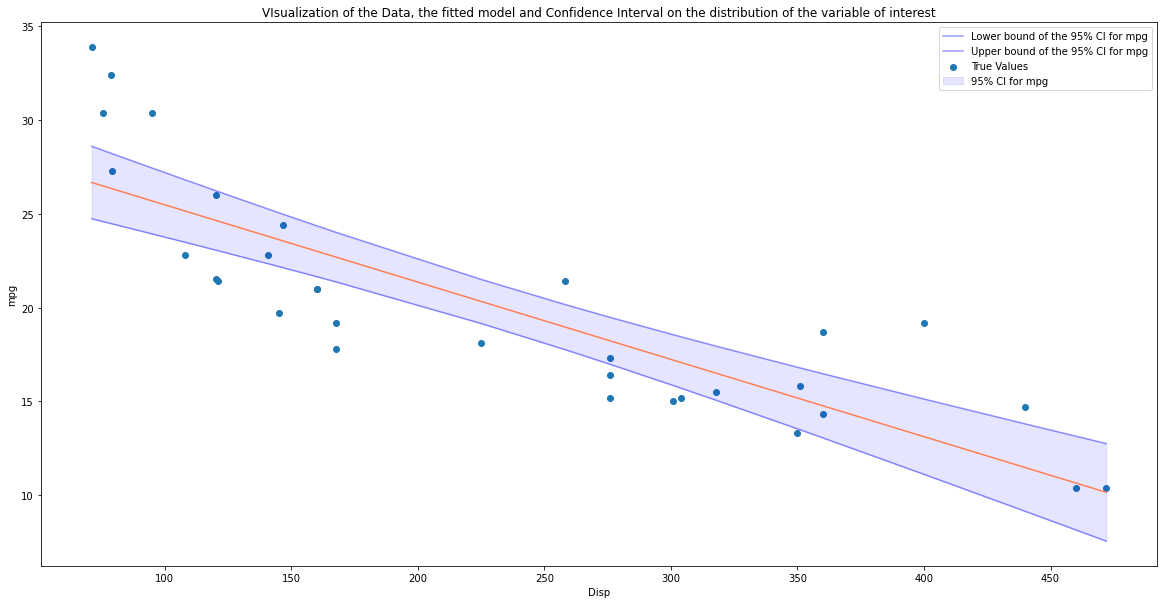

In [51]:
plt.figure(figsize = (20, 10))
plt.scatter(summary['x_disp'], summary['y'], label='True Values')
plt.plot(summary['x_disp'], lower_CI, color='blue', alpha = 0.4, label = 'Lower bound of the 95% CI for mpg')
plt.plot(summary['x_disp'], upper_CI, color='blue', alpha=0.4, label = 'Upper bound of the 95% CI for mpg')
plt.fill_between(summary['x_disp'], lower_CI, upper_CI, color='blue', alpha = 0.1, label='95% CI for mpg')
plt.plot(summary['x_disp'], mean_values, color='coral')
plt.title('VIsualization of the Data, the fitted model and Confidence Interval on the distribution of the variable of interest')
plt.xlabel('Disp')
plt.ylabel('mpg')
plt.legend()
plt.show()

<div class='exercise-r'>  
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?
 
 </div>

Until now, we have always computed the MLE of the parameters for Linear Regression. However, when we do not want to compute point-estimate for our parameters, in order to have an understanding of the distribution of the coefficients, we will have Confidence Interval for the parameters. These Confidence Intervals can be obtained by bootstrapping our Training Data and computing the percentiles for parameters estimate of every bootstrapped training set, or analytically when we know the variance of the random noise (we can estimate it via MLE). 

<div class='exercise-r'>  
 
**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Paying attention to the confidence interval (1.1.3) above?
 
 </div>

In [62]:
values = summary[summary['x_disp']==400]
lower_CI, upper_CI = values['mean_ci_lower'].values[0], values['mean_ci_upper'].values[0]
values

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x_disp,y
24,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077,400.0,19.2


In [63]:
# your code here
print('The estimation of the mean mpg for a disp value of 400 would lie between ' + str(lower_CI) + ' and '+str(upper_CI))

The estimation of the mean mpg for a disp value of 400 would lie between 11.105975775409771 and 15.121637766689215


*Your answer here*

<div class='exercise-r'>  
 
**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center?
 
 </div>

The expected shape for the 95% interval for the mean predicted interval is: narrow when we have a lot of training examples and quite wider when we are far away from the data. This is what happens in this case: when we see a lot of training data, we are pretty more confident for our estimate than when we do not see much training data.

<div class='exercise-r'>  
 
**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap.  Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.
 
 </div>

In [68]:
# your code here
import itertools
params = []
n_bootstrap = 100
for _ in itertools.repeat(None, n_bootstrap):
    df_bootstrapped = df.sample(frac=1, replace=True)
    y = df_bootstrapped[['mpg']].values
    X = df_bootstrapped[['cyl','disp','hp','wt','qsec']]
    X = sm.add_constant(X)
    X_disp = X[['const', 'disp']]
    ols1 = sm.OLS(y, X_disp).fit()
    params.append(ols1.params)

In [87]:
X_disp = X[['const', 'disp']]
ols1 = sm.OLS(y, X_disp).fit()
beta0, beta1 = ols1.params

In [88]:
x_plot =np.linspace(0, 500, 500)
predictions = []
for x in x_plot:
    pred_y = []
    for param in params:
        pred_y_param = param[0]+param[1]*x
        pred_y.append(pred_y_param)
    predictions.append(pred_y)
predictions = np.asarray(predictions).T
print(predictions.shape)
lower_CIs = [np.percentile(predictions[:, i], 2.5) for i in range(predictions.shape[1])]
upper_CIs = [np.percentile(predictions[:, i], 97.5) for i in range(predictions.shape[1])]
mean = beta0 + beta1*x_plot

(100, 500)


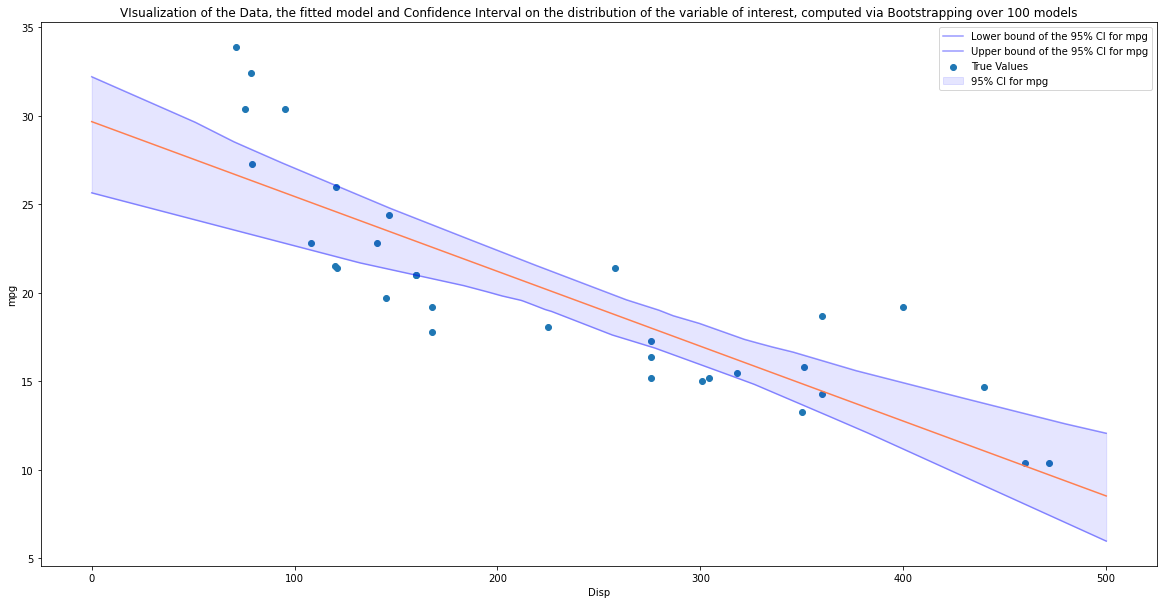

In [91]:
plt.figure(figsize = (20, 10))
plt.scatter(summary['x_disp'], summary['y'], label='True Values')
plt.plot(x_plot, lower_CIs, color='blue', alpha = 0.4, label = 'Lower bound of the 95% CI for mpg')
plt.plot(x_plot, upper_CIs, color='blue', alpha=0.4, label = 'Upper bound of the 95% CI for mpg')
plt.fill_between(x_plot, lower_CIs, upper_CIs, color='blue', alpha = 0.1, label='95% CI for mpg')
plt.plot(x_plot, mean, color='coral')
plt.title('VIsualization of the Data, the fitted model and Confidence Interval on the distribution of the variable of interest, computed via Bootstrapping over 100 models')
plt.xlabel('Disp')
plt.ylabel('mpg')
plt.legend()
plt.show()

Both plots are very similar. I believe OLS compute the Confidence Interval thanks to the analytical equation leveraging the standard error. Here, maybe we do not use enough bootstrap in order for our different estimates to fully converge. We could try increasing the number of bootstraps in order to see if our bootstrap-estimated CI will converge towards the one computed with statsmodel. 

<div class='exercise-r'>  
 
**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.
 
 </div>

The 95% prediction interval will be wider than the corresponding 95% interval for the mean predicted mpg. Indeed, the prediction encodes the $\textbf{irreducible error}$ of our model. Therefore, we add the prediction error that comes from the fact that our estimate of $\beta$ is random and the model error. 